In [14]:
#Task 1: Exploratory Data Analysis (EDA) and Business Insights

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_path = 'C:\\Users\\gaura\\Downloads\\Customers.xlsx'
products_path = 'C:\\Users\\gaura\\Downloads\\Products.xlsx'
transactions_path = 'C:\\Users\\gaura\\Downloads\\Transactions.xlsx'

customers_df = pd.read_excel(customers_path)
products_df = pd.read_excel(products_path)
transactions_df = pd.read_excel(transactions_path)

# Merge datasets
merged_data = transactions_df.merge(customers_df, on="CustomerID", how="left").merge(products_df, on="ProductID", how="left")


In [3]:
# Top 5 products by sales
print("Top 5 Products by Sales:")
top_products = (
    merged_data.groupby("ProductName")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(top_products)

Top 5 Products by Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


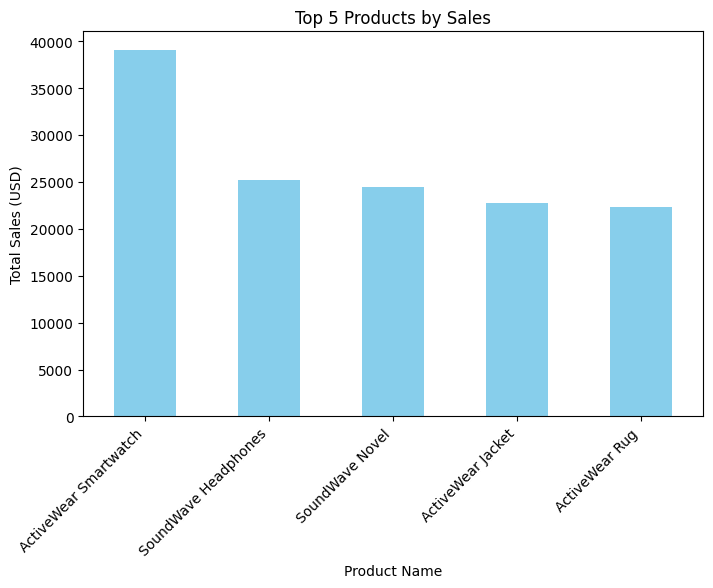

In [4]:
# Visualization: Top 5 Products by Sales
plt.figure(figsize=(8, 5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 5 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [5]:
# Total revenue by region
print("\nRevenue by Region:")
revenue_by_region = (
    merged_data.groupby("Region")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
)
print(revenue_by_region)


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


C:\Users\gaura\AppData\Local\Temp\ipykernel_11720\3402436344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")


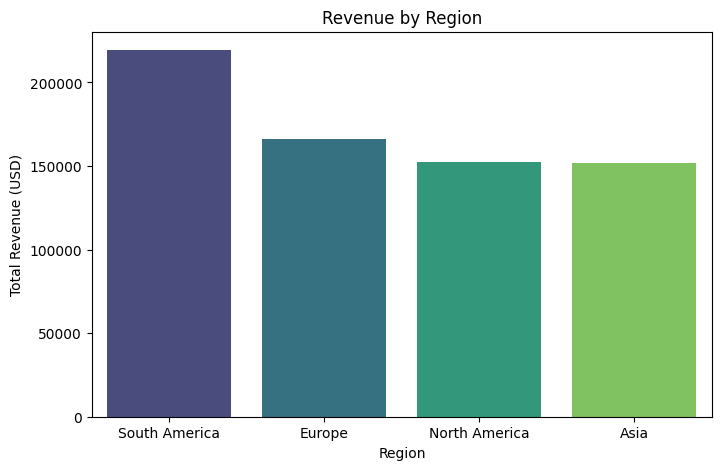

In [6]:
# Visualization: Revenue by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()


In [7]:
# Most popular product categories by quantity sold
print("\nMost Popular Categories by Quantity Sold:")
popular_categories = (
    merged_data.groupby("Category")["Quantity"]
    .sum()
    .sort_values(ascending=False)
)
print(popular_categories)



Most Popular Categories by Quantity Sold:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


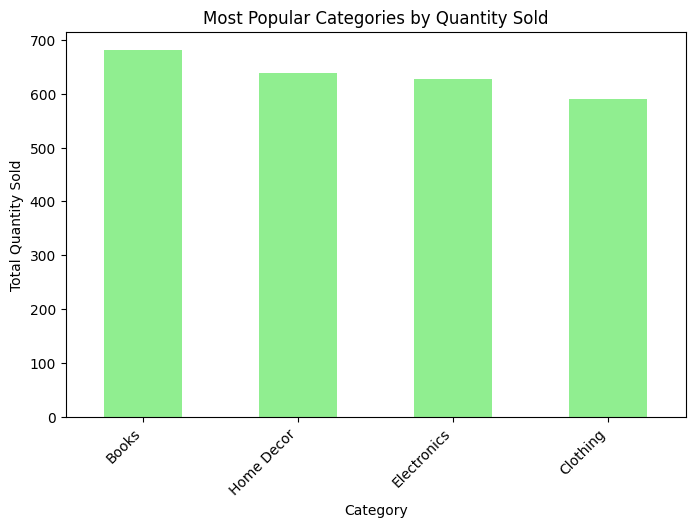

In [8]:
# Visualization: Most Popular Categories by Quantity Sold
plt.figure(figsize=(8, 5))
popular_categories.plot(kind="bar", color="lightgreen")
plt.title("Most Popular Categories by Quantity Sold")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()


In [9]:
# Monthly revenue trends
merged_data["TransactionMonth"] = merged_data["TransactionDate"].dt.to_period("M")
print("\nMonthly Revenue Trends:")
monthly_revenue = (
    merged_data.groupby("TransactionMonth")["TotalValue"]
    .sum()
    .sort_index()
)
print(monthly_revenue)


Monthly Revenue Trends:
TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


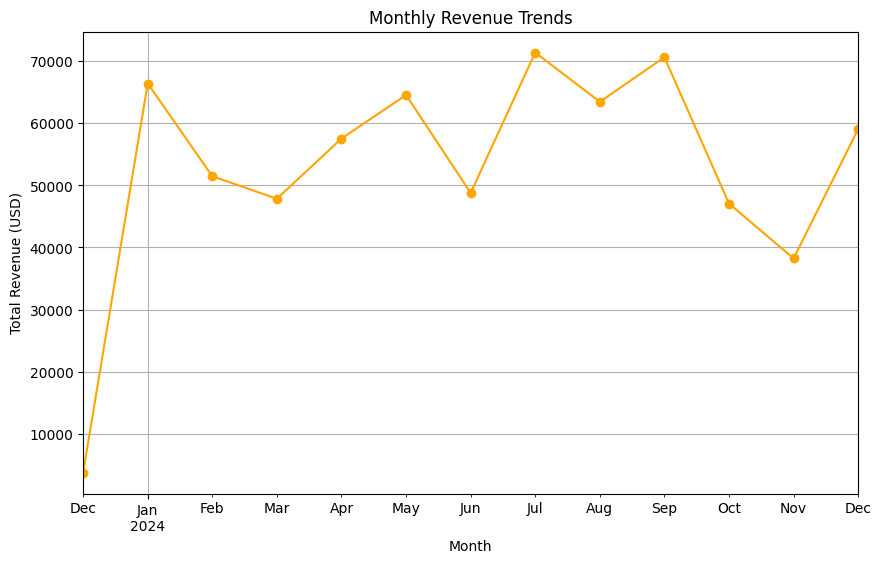

In [10]:
# Visualization: Monthly Revenue Trends
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind="line", marker="o", color="orange")
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.grid(True)
plt.show()


In [11]:
# Customer distribution by region
print("\nCustomer Distribution by Region:")
customer_distribution = customers_df["Region"].value_counts()
print(customer_distribution)



Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


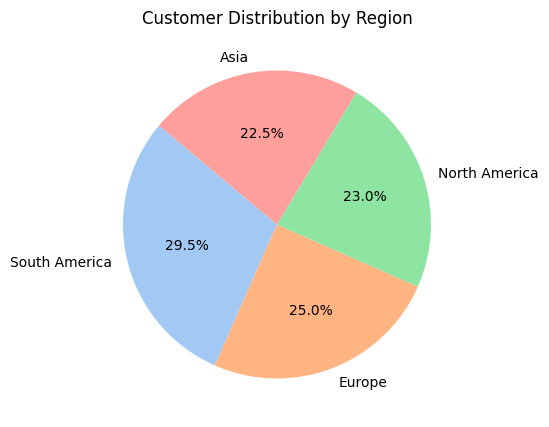

In [12]:
# Visualization: Customer Distribution by Region
plt.figure(figsize=(8, 5))
customer_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Region")
plt.ylabel("")
plt.show()
